In [1]:
# Imports and general data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import re

from sklearn import preprocessing
from scipy.stats import chi2_contingency
from matplotlib.backends.backend_pdf import PdfPages


# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

#Plotting inline
%matplotlib inline

In [2]:
leavetimes_df = pd.read_csv(r'C:\Users\turlo\OneDrive\Documents\MSC_Computer_Science\Summer_Project\Data\Feature_Engineering_Sets\trim_leavetimes.csv', sep=';')
trips_df = pd.read_csv(r'C:\Users\turlo\OneDrive\Documents\MSC_Computer_Science\Summer_Project\Data\Feature_Engineering_Sets\trim_trips.csv', sep=';')

Graph:
- X axis - Journey start time (hour)
- y axis - total travel time of route (seconds)

Group by day of week


In [3]:
leavetimes_df.head()

,DATASOURCE,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,PASSENGERS,PASSENGERSIN,PASSENGERSOUT,DISTANCE,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,15-JAN-18 00:00:00,6114847,40,60,39356,39356,39469,39482,1000912,NaN,NaN,NaN,NaN,NaN,NaN,23-JAN-18 10:24:03,NaN
1,DB,15-JAN-18 00:00:00,6119911,40,60,44156,44156,44246,44259,1000183,NaN,NaN,NaN,NaN,NaN,NaN,23-JAN-18 10:24:03,NaN
2,DB,15-JAN-18 00:00:00,6107234,40,60,45356,45356,45172,45188,2868369,NaN,NaN,NaN,NaN,NaN,NaN,23-JAN-18 10:24:03,NaN
3,DB,15-JAN-18 00:00:00,6107787,40,60,41756,41756,41719,41734,2693269,NaN,NaN,NaN,NaN,NaN,NaN,23-JAN-18 10:24:03,NaN
4,DB,15-JAN-18 00:00:00,6109346,40,60,40556,40556,40355,40373,1001137,NaN,NaN,NaN,NaN,NaN,NaN,23-JAN-18 10:24:03,NaN


In [4]:
# Adjust times from seconds to hh:mm:ss and get the expected and actual trip time
trips_df['PLANNEDTIME'] = (trips_df['PLANNEDTIME_ARR'] - trips_df['PLANNEDTIME_DEP'])
trips_df['ACTUALTIME'] = (trips_df['ACTUALTIME_ARR'] - trips_df['ACTUALTIME_DEP'])
trips_df['ACTUALTIME_SECONDS'] = trips_df['ACTUALTIME']
trips_df['HOUR'] = pd.to_datetime(trips_df['PLANNEDTIME_DEP'], unit='s').dt.strftime("%H:00:00")
trips_df['DATE'] = pd.to_datetime(trips_df['DAYOFSERVICE']).dt.strftime('%Y-%m-%d')

In [5]:
# Combine data tables and keep only the relevant headings
result = pd.merge(trips_df[['DATE','TRIPID','LINEID','ROUTEID','DIRECTION', 'ACTUALTIME_SECONDS', 'HOUR']],
                  leavetimes_df[['PROGRNUMBER','STOPPOINTID', 'TRIPID']],
                 on='TRIPID', 
                 how='left')



In [6]:
result['DATE'] = pd.to_datetime(result['DATE'])
result['WEEKDAY'] = result['DATE'].dt.day_name()

In [7]:
is_route =  result['LINEID']== "122"
used_route = result[is_route]

In [8]:
used_route.to_csv("results.csv")

In [9]:
is_first =  used_route['PROGRNUMBER']==1
first_stop = used_route[is_first]

In [10]:
first_stop

,DATE,TRIPID,LINEID,ROUTEID,DIRECTION,ACTUALTIME_SECONDS,HOUR,PROGRNUMBER,STOPPOINTID,WEEKDAY
61828,2018-01-15,6114854,122,122_14,1,NaN,19:00:00,1,4525,Monday
61881,2018-01-15,6114854,122,122_14,1,NaN,19:00:00,1,4525,Monday
61914,2018-01-15,6114854,122,122_14,1,NaN,19:00:00,1,4525,Monday
62030,2018-01-15,6114854,122,122_14,1,NaN,19:00:00,1,4525,Monday
62043,2018-01-15,6114854,122,122_14,1,NaN,19:00:00,1,4525,Monday
...,...,...,...,...,...,...,...,...,...,...
9862378,2018-01-16,6108870,122,122_14,1,NaN,08:00:00,1,4525,Tuesday
9862461,2018-01-16,6108870,122,122_14,1,NaN,08:00:00,1,4525,Tuesday
9862499,2018-01-16,6108870,122,122_14,1,NaN,08:00:00,1,4525,Tuesday
9862527,2018-01-16,6108870,122,122_14,1,NaN,08:00:00,1,4525,Tuesday


In [11]:
results_chart = first_stop[['WEEKDAY', 'LINEID', 'DIRECTION', 'ACTUALTIME_SECONDS', 'HOUR']]

In [12]:
results_chart = results_chart[results_chart['ACTUALTIME_SECONDS'].notna()]

In [13]:
results_chart.drop_duplicates(inplace=True)

In [14]:
results_chart

,WEEKDAY,LINEID,DIRECTION,ACTUALTIME_SECONDS,HOUR
62054,Monday,122,1,3414.0,19:00:00
118138,Monday,122,1,2761.0,20:00:00
118366,Monday,122,1,3353.0,20:00:00
118616,Monday,122,1,3750.0,19:00:00
448460,Monday,122,1,4931.0,07:00:00
...,...,...,...,...,...
9806347,Tuesday,122,1,3591.0,19:00:00
9818720,Tuesday,122,1,3708.0,10:00:00
9835011,Tuesday,122,1,3386.0,19:00:00
9856216,Tuesday,122,2,4405.0,13:00:00


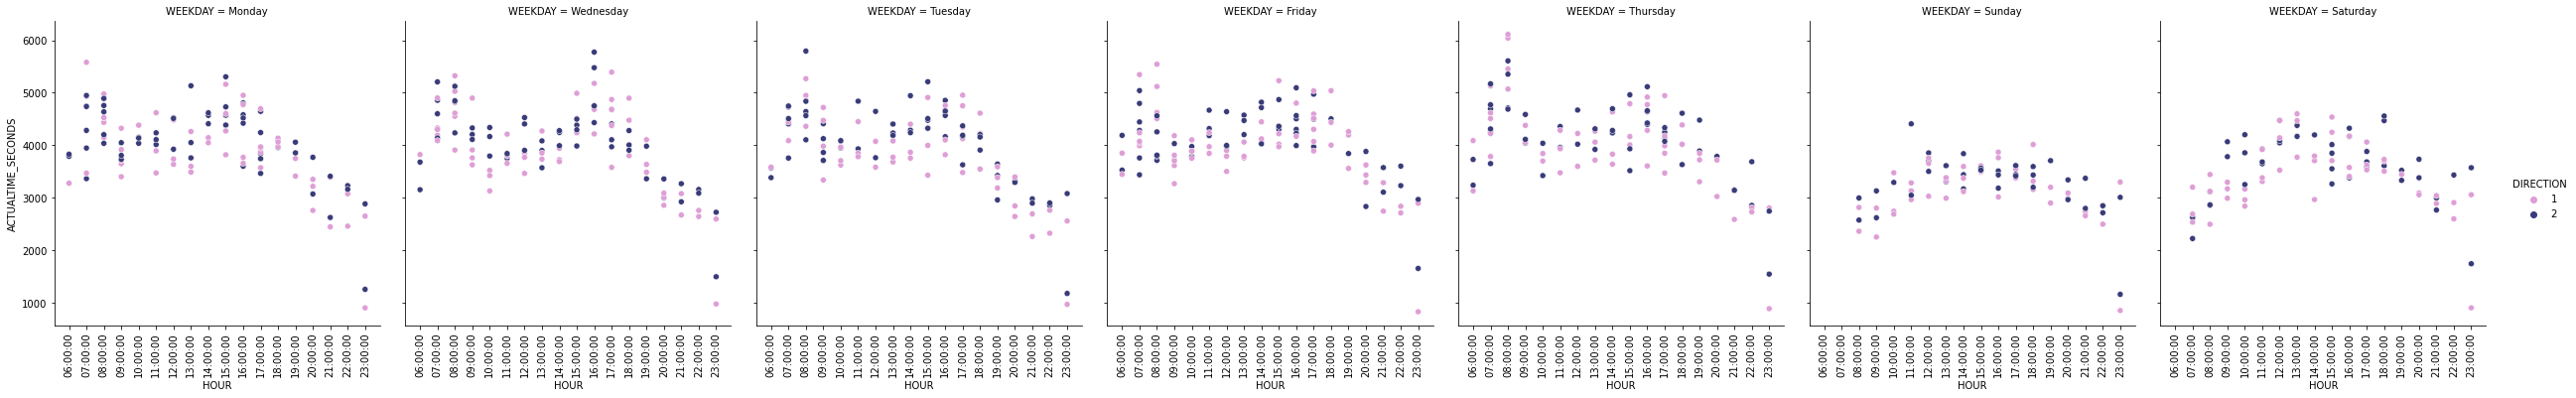

In [32]:
results_chart["HOUR"] = pd.Categorical(results_chart["HOUR"], categories=sorted(set(results_chart["HOUR"])), ordered=True)
g = sns.relplot(data=results_chart, x="HOUR", y="ACTUALTIME_SECONDS", hue="DIRECTION",  col="WEEKDAY", height=5, palette='tab20b_r')

g.set_xticklabels(rotation=90)